# AUT Dataset: Loading and exploring

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

All the datasets can be loaded from here: https://github.com/massivetexts/llm_aut_study/blob/main/notebooks/Process_AUT_GT.ipynb 

Originally, the people of the papers combined 9 datasets together but we managed to combined only 7 (one got an error for preprocessing and the other one is not available)

In [3]:
all_data = pd.read_csv('./../data/cleaned_all_data.csv') # took the cleaned data from notebook Process_AUT_GT_Maxime.ipynb
print(f"Number of samples in all_data: {len(all_data)}")

# only take data for AUT: type == 'uses'
all_data_aut = all_data[all_data['type'] == 'uses']
print(f"Number of samples in all_data_aut: {len(all_data_aut)}")
all_data_aut.head()

Number of samples in all_data: 20775
Number of samples in all_data_aut: 14584


,Unnamed: 0,type,src,question,prompt,response,id,target,participant,response_num,index,count
0,0,uses,dod20,What is a surprising use for PANTS?,pants,fashion,dod20_pants-160974,1.0,dod2037,6.0,14274.0,2.0
3,3,uses,betal18,What is a surprising use for a ROPE?,rope,use it to tie up a bicycle,betal18_rope-1dd6b7,1.9,betal182093,NaN,NaN,NaN
4,4,uses,betal18,What is a surprising use for a ROPE?,rope,steps,betal18_rope-672857,1.3,betal182076,NaN,NaN,NaN
5,5,uses,snb17,What is a surprising use for a ROPE?,rope,dog toy,snb17_rope-4992bc,1.4,snb17113,NaN,15139.0,14.0
6,6,uses,snbmo09,What is a surprising use for a BOX?,box,use it to reach something,snbmo09_3_box-eb5ed0,1.7,snbmo0979,4.0,NaN,NaN


## EDA

Number of unique objects: 12
Average originality score: 2.085
Average length of the response: 21.853


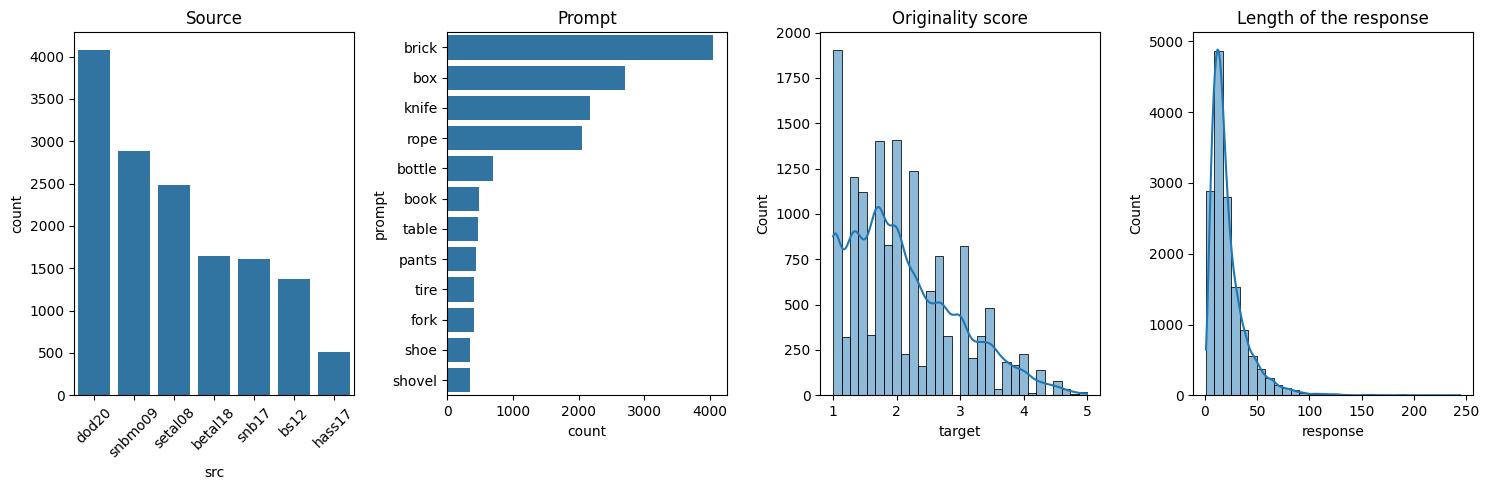

In [4]:
fig, axs = plt.subplots(1, 4, figsize = (15, 5))

# source
sns.countplot(data = all_data_aut, x = 'src', ax = axs[0], order = all_data_aut['src'].value_counts().index)
axs[0].set_title('Source')
axs[0].tick_params(axis='x', rotation=45)

# Object in the prompt
sns.countplot(all_data_aut['prompt'], ax = axs[1], order = all_data_aut['prompt'].value_counts().index)
axs[1].set_title('Prompt')

# Originality score (average of several ratings)
sns.histplot(all_data_aut['target'], ax = axs[2], bins = 30, kde = True)
axs[2].set_title('Originality score')

# Length of the response
sns.histplot(all_data_aut['response'].str.len(), ax = axs[3], bins = 30, kde = True)
axs[3].set_title('Length of the response')

print(f"Number of unique objects: {len(all_data_aut['prompt'].unique())}")
print(f"Average originality score: {all_data_aut['target'].mean().round(3)}")
print(f"Average length of the response: {all_data_aut['response'].str.len().mean().round(3)}")

plt.tight_layout()
plt.show()

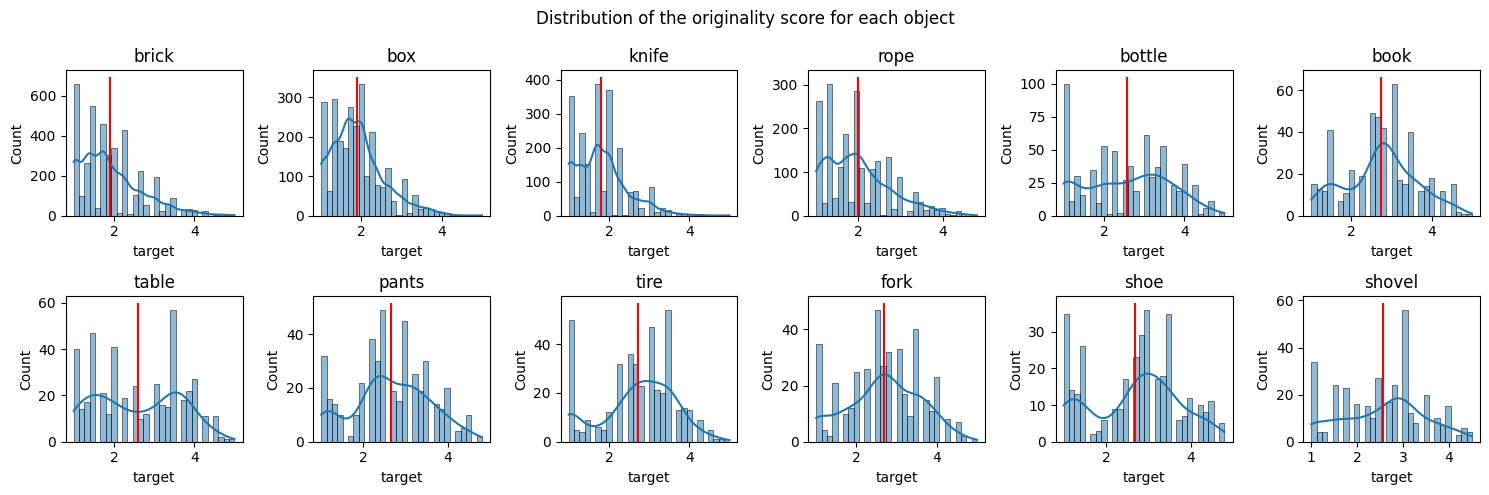

In [14]:
# Look at the distribution of the originality score for each object
fig, axs = plt.subplots(2, 6, figsize = (15, 5))
for i, prompt in enumerate(all_data_aut['prompt'].value_counts().index):
    ax = axs[i // 6, i % 6]
    sns.histplot(all_data_aut[all_data_aut['prompt'] == prompt]['target'], ax = ax, bins = 30, kde = True)
    ax.set_title(prompt)
    ax.vlines(all_data_aut[all_data_aut['prompt'] == prompt]['target'].mean(), 0, ax.get_ylim()[1], color = 'red')

plt.suptitle('Distribution of the originality score for each object')
plt.tight_layout()
plt.show()

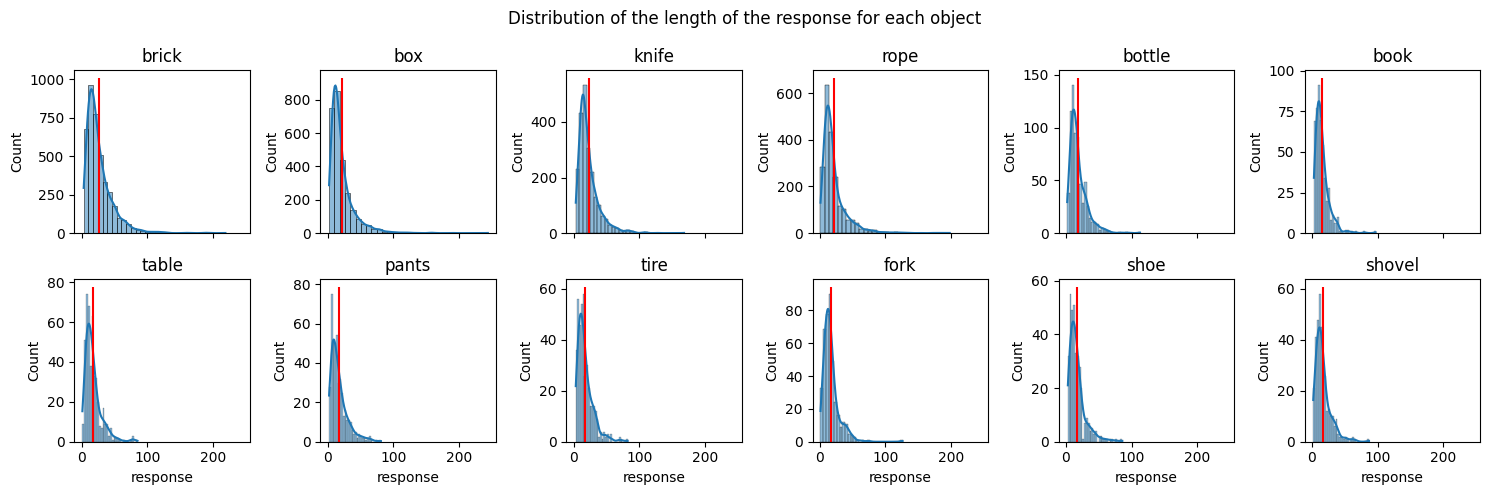

In [17]:
fig, axs = plt.subplots(2, 6, figsize = (15, 5), sharex=True)
for i, prompt in enumerate(all_data_aut['prompt'].value_counts().index):
    ax = axs[i // 6, i % 6]
    sns.histplot(all_data_aut[all_data_aut['prompt'] == prompt]['response'].str.len(), ax = ax, bins = 30, kde = True)
    ax.set_title(prompt)
    ax.vlines(all_data_aut[all_data_aut['prompt'] == prompt]['response'].str.len().mean(), 0, ax.get_ylim()[1], color = 'red')

plt.suptitle('Distribution of the length of the response for each object')
plt.tight_layout()
plt.show()